In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/car_purchasing.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [3]:
df.isnull().values.any()

False

In [4]:
df.isna()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


**# Define your features (independent variables) and target variable (sales amount)**

In [6]:
X = df[['age', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

**# Split the data into training and testing sets**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**# Create and train a linear regression model**

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Save the trained model to a file

In [9]:
import joblib
joblib.dump(model, 'sales_prediction_model.joblib')

['sales_prediction_model.joblib']

**# Make predictions on the test data**

In [10]:
y_pred = model.predict(X_test)

**# Evaluate the model**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error: 1.1500843450763931
Mean Squared Error: 2.0698043894617446
Root Mean Squared Error: 1.4386814760264848
R-squared (R2) Score: 0.9999999808303804


# Visualization of model performance

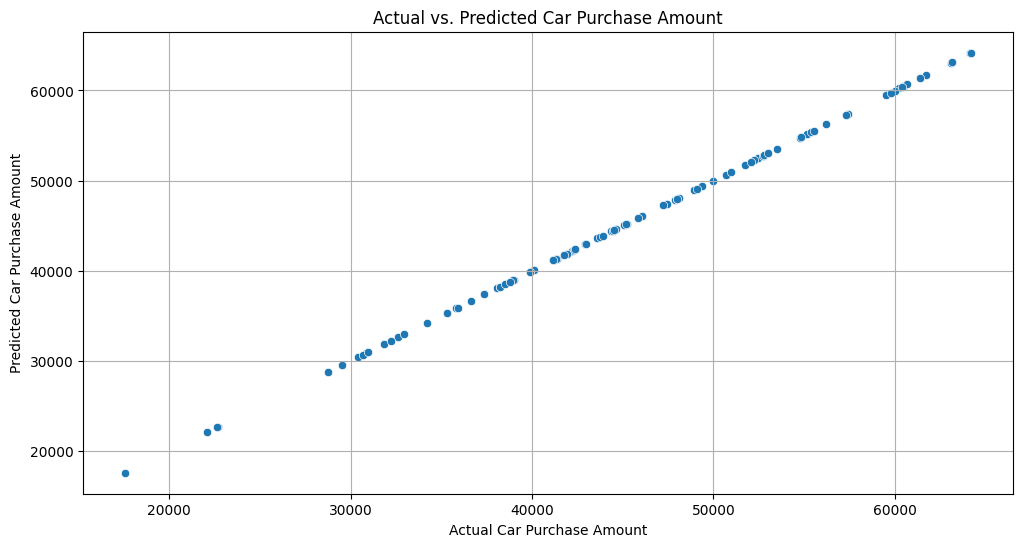

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6)) # Width, height in inches
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel('Predicted Car Purchase Amount')
plt.title('Actual vs. Predicted Car Purchase Amount')
plt.grid(True)
plt.show()

#use the trained model to make predictions for new data

In [14]:
new_data = pd.DataFrame({'age':[30], 'annual Salary': [60000],
                         'credit card debt': [3000],
                         'net worth': [75000]})

# Load the saved model

In [15]:
loaded_model = joblib.load('sales_prediction_model.joblib')
prediction = loaded_model.predict(new_data)

In [16]:
print(f'Predicted Car Purchace Amount: {prediction[0]}')

Predicted Car Purchace Amount: 19013.47044238248
